In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

# 1

#### $$L = \sum\limits_{i = 1}^l (y_i - \check{y})^2 \rightarrow \min\limits_{\check{y}}$$
$$\frac{\partial L}{\partial\check{y}} = -\sum\limits_{i = 1}^l 2(y_i - \check{y}) = 0 \Rightarrow \check{y} = \frac{1}{l}\sum\limits_{i = 1}^{l} y_i = \overline{y}$$

# 3

#### $\check{y} = \check{w}x + \check{b}$ - прямая, построенная по МНК, где параметры $\check{w}, \check{b}$ находится из минимизации функции $L = \sum\limits_{i = 1}^{l}(y_i - wx_i - b)^2$:

 \begin{cases}
   \frac{\partial \mathcal{L}}{\partial w} = 2\sum\limits_{i = 1}^{l}(y_i - wx_i - b)(-x_i) = 0 \\
   \frac{\partial \mathcal{L}}{\partial b} = 2\sum\limits_{i = 1}^{l}(y_i - wx_i - b)(-1) = 0
 \end{cases}

#### Из второго уравнения, деля на $l$, сразу получаем: $\overline{y} = \check{w}\overline{x} + \check{b}$. Обобщим на случай многомерной регрессии:

$\check{y} = X\check{w}$, где $X$ - матрица объект-признак (свободный член можно сразу учесть). Воспльзуемся сразу ответом (его легко получить из тензорной нотации): $\check{w} = (X_0^{T}X_0)^{-1}X_0^{T}y_0$, где нижний индекс "0" означает исходную серию измерений. Подставим в качестве $X$ начальную матрицу $X_0$ и домножим слева на $X_0^T$: $X_0^T \check{y_0} = (X_0^T X_0)  (X_0^{T}X_0)^{-1}X_0^{T}y_0 = X_0^T y_0 \Rightarrow X_0^T(\check{y_0} - y_0) = 0$. Считая признаки независимами, то есть столбцы матрицы $X_0$ независимыми, получим: $\check{y_0} = y_0$. Таким образом, гиперплоскость, построенная по МНК, пересекается с исходной гиперплоскостью (по серии измерений).

# 4

(Не общий случай) $\\$
$X = \left(X_1, X_2, \ldots, X_n\right)$
1) $X \rightarrow \tilde{X} = \left(X_1 - \overline{X_1}, X_2 - \overline{X_2} ,\ldots, X_n -\overline{X_n}\right) \Rightarrow \tilde{X}^T\tilde{X} = \left(
\begin{array}{c}
(X_1 - \overline{X_1})^T\\
(X_2 - \overline{X_2})^T\\
\vdots\\
(X_n - \overline{X_n})^T
\end{array}
\right)\left(X_1 - \overline{X_1}, X_2 - \overline{X_2} ,\ldots, X_n -\overline{X_n}\right) = \left(\begin{array}{cccc}
(X_1 - \overline{X_1})^T(X_1 - \overline{X_1}) & (X_1 -\overline{X_1})(X_2-\overline{X_2}) & \ldots & (X_1 - \overline{X_1})^T(X_n - \overline{X_n})\\
(X_2 - \overline{X_2})^T(X_1 - \overline{X_1}) & (X_2 - \overline{X_2})^T(X_2 - \overline{X_2}) & \ldots & (X_2 - \overline{X_2})^T(X_n - \overline{X_n})\\
\ldots & \ldots & \ldots & \ldots\\
(X_n - \overline{X_n})^T(X_1 - \overline{X_1}) & (X_n - \overline{X_n})^T(X_2 - \overline{X_2}) & \ldots & (X_n - \overline{X_n})^T(X_n - \overline{X_n})
\end{array}\right) =
l\left(\begin{array}{cccc}
\check{var} X_1  & \check{cov}(X_1, X_2) & \ldots & \check{cov}(X_1, X_n)\\
\check{cov}(X_1, X_2) & \check{var} X_2 & \ldots & \check{cov}(X_2, X_n)\\
\ldots & \ldots& \ldots& \ldots\\
\check{cov}(X_1, X_n) & \check{cov}(X_2, X_n) &\ldots &    \check{var} X_n
\end{array}\right)$

# 5

In [2]:
import seaborn
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
Data = seaborn.load_dataset('anscombe')
print(Data.head())
print(Data.tail())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [3]:
data1 = Data["dataset"] == "I"
data2 = Data["dataset"] == "II"
data3 = Data["dataset"] == "III"
data4 = Data["dataset"] == "IV"

In [4]:
def plot(data):
    x = Data[data]["x"]
    y = Data[data]["y"]
    varx = round(np.var(x), 2)
    vary = round(np.var(y), 2)
    r = round(np.sum((x - np.mean(x)) * (y - y.mean())) / np.sqrt(varx * vary) / np.size(x), 2)
    plt.scatter(x, y, label = fr'$\hat{{var}}x = {varx}, \hat{{var}}y = {vary}, r = {r}$')
    fp = np.polyfit(x, y, 1)
    f = sp.poly1d(fp)
    plt.plot(x, f(x), linewidth=1, c="g")
    plt.legend()

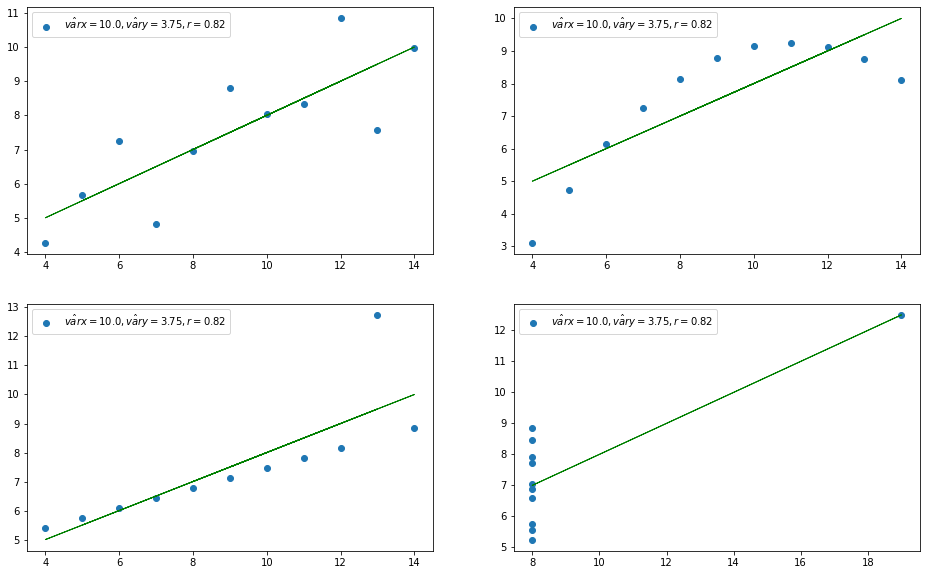

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plot(data1)
plt.subplot(222)
plot(data2)
plt.subplot(223)
plot(data3)
plt.subplot(224)
plot(data4)

 Видим, что дисперсии и коэффициент Пирсона одинаковы для всех 4ых выборок, но точки лежат совершенно по-разному. Это демонстрирует особую важность визуального анализа данных.

# 6

 $y = Xw$, где $y$ - вектор размерности $l$, матрица $X$ - размера $l \times m$, $w$ - вектор параметров размера $m$. Причём $m > l$, так как система недоопределена.

Нам необходимо подобрать вектор $w$ с минимальной нормой, который удовлетворяет уравнению $y = Xw, \|w\| = w^Tw - min$. Введём функционал так, чтобы учесть связь с $y$: $\mathcal{L} (w, C) = w^Tw + C(y - Xw)$, где $C$ - строчка констант, а $(y - Xw)$ - нулевой вектор. Воспользуемся тензорной нотацией Эйнштейна: $\mathcal{L} (w, C) = w_iw_i + C_i (y_i - X_{ij}w_j)$. 

$\forall k \in \overline{1, m} \hookrightarrow \frac{\partial\mathcal{L} }{\partial w_k} = 2w_k - C_iX_{ij} \delta_{jk} = 2w_k - C_i X_{ik} = 0, \frac{\partial^2 \mathcal{L}}{\partial w_k\partial w_q} = 2\delta_{kq}$. То есть первое выражение действительно минимизирует функционал, так как квадратичная форма второго потенциала положительно определена.

Отсюда: $w = \frac{1}{2} X^TC^T \Rightarrow y = \frac{1}{2} X X^T C^T \Rightarrow C^T = (XX^T)^{-1} 2y$. Обратная матрица сущесвует, так как матрица $X$ имеет полный ранг и $l < m$.

В итоге получаем $w = X^T(XX^T)^{-1}y$. Видим, что ответ действительно выражается через правую псевдообратную матрицу $X$. 

# 7

In [12]:
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # импортируемые данные
y = np.array([249, 475, 708, 939, 1157, 1383, 1614, 1846, 2070, 2309])  # импортируемые данные

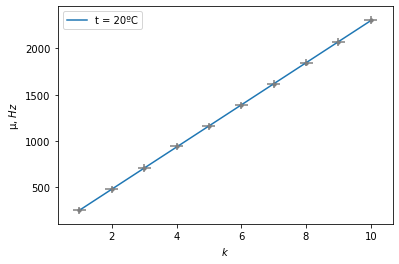

In [41]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(1, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()

ax.set_ylabel('µ, $Hz$')
ax.set_xlabel('$k$')
ax.plot(x, y, '.', color='tab:gray')
ax.plot(xfit, yfit, color='tab:blue', label='t = 20ºC')
ax.errorbar(x, y, yerr=40, xerr = 0.2, fmt = '.', color='tab:gray')  # кресты погрешности
ax.legend()
plt.show()

# 8

$$\rho(\tilde{y}) = \frac{1}{(2\pi)^{l/2}(det A^{-1})^{1/2}}exp(-\frac{1}{2}(\tilde{y}-y)^TA(\tilde{y} - y)),$$

где $\tilde{y} = (\tilde{y_1} \ldots \tilde{y_l})^T, y = (y_1 \ldots y_l)^T$ 

1) Сделаем замену $\tilde{y} - y = Sz$, где матрица $S$ - переводит матрицу $A$ в диагональный вид $D = S^T AS$ (Из теории вероятности известно, что в данном случае матрица $S$ является ортогональной (сразу получаем $(det S)^2 = 1$)).

$det A^{-1} = \frac{1}{detA}$. По свойствам определителя: $det D = det S^T det A det S = det A (det S)^2 = det A$. Подставляя замену в плотность вероятности, получаем:

$$\rho(z) = \frac{(det D)^{1/2}}{(2\pi)^{l/2}}exp(-\frac{1}{2}(d_{11}z_1^2 + \ldots d_{ll}z_l^2))$$

Выполним интегрирование по $\mathbb{R}^l$: $\int\limits_{\mathbb{R}^l}\frac{\sqrt{d_{11}\ldots d_{ll}}}{(2\pi)^{l/2}}exp(-\frac{1}{2}(d_{11}z_1^2 + \ldots d_{nn}z_n^2))dz =  / t_i = \sqrt{d_{ii}}z_i, dz_i = \frac{dt_i}{\sqrt{d_{ii}}}/ = \int\limits_{\mathbb{R}^l}\frac{1}{(2\pi)^{l/2}}exp(-\frac{1}{2}(t_1^2 + \ldots t_n^2))dt = 1$ - с использованием теоремы Фубини и значения интеграла Эйлера.

2) Предложенный подход через интегрирование является не очень понятным, поэтому сделаем через способы теории вероятности:

$\tilde{y}$ - Гаусов вектор, поэтому справедливо такое разложение: $\tilde{y} = B(\eta_1 \ldots \eta_m)^T + b^T$, где $B\in\mathbb{R}^{l\times m}, b \in \mathbb{R}^l, \eta_i \sim \mathcal{N}(0, 1)$ - независимые величины. Согласно доказательству (на основе характеристических функций) матрица $B = (\sqrt{D}S)^{-1}$. 

$\langle\langle \tilde{y_i} \tilde{y_j} \rangle\rangle = cov(\tilde{y_i}, \tilde{y_j}) = cov((B\eta)_i + b_i, (B\eta)_j + b_j) = cov((B\eta)_i, (B\eta)_j) = cov(B_{i\alpha}\eta_{\alpha},B_{j\beta}\eta_{\beta}) = B_{i\alpha}B_{j\beta}cov(\eta_{\alpha}, \eta_{\beta}) = B_{i\alpha}B_{j\beta}\delta_{\alpha\beta} = (BB^T)_{ij}$

$BB^T = S^{-1}\sqrt{D}^{-1}(\sqrt{D}^{-1})^T (S^{-1})^T = S^TD^{-1}S = A^{-1}$ - матрица ковариации $\Rightarrow  \langle\langle \tilde{y_i} \tilde{y_j} \rangle\rangle = A_{ij}^{-1}$

3) Действуем по аналогии с лекции: пусть $Q = (X^TX)^{-1}X^T$. 

$\langle\langle \tilde{w_{\alpha}} \tilde{w_{\beta}}\rangle\rangle = Q_{\alpha i}Q_{\beta j}\langle(\tilde{y_i} - y_i)(\tilde{y_j} - y_j)\rangle = Q_{\alpha i}Q_{\beta j}\langle\langle \tilde{y_i} \tilde{y_j} \rangle\rangle = Q_{\alpha i}Q_{\beta j}A_{ij}^{-1}$

$var \tilde{w_{\alpha}} = \langle\langle \tilde{w_{\alpha}} \tilde{w_{\alpha}}\rangle\rangle = Q_{\alpha i}Q_{\alpha j}A_{ij}^{-1}$(суммирования по $\alpha$ не происходит).

4) $A = diag(A_1, \ldots, A_l) \Rightarrow var \tilde{w_{\alpha}} = Q_{\alpha i}Q_{\alpha i}A^{-1}_i$. Должно выполняться $A_i^{-1} = s_i$

Рассмотрим случай 1 D регрессии $y = w_1x + w_0$: 
    

$X = \left(
\begin{array}{cc}
x_1 & 1\\
x_2 & 1\\
\vdots & \vdots\\
x_l & 1
\end{array}
\right)
\Rightarrow X^TX = l\left(
\begin{array}{cc}
\overline{x^2} & \overline{x}\\
\overline{x} & 1\\
\end{array}
\right) \Rightarrow (X^TX)^{-1} =\frac{1}{l\hat{varx}}
\left(
\begin{array}{cc}
1 & -\overline{x}\\
-\overline{x} & \overline{x^2}\\
\end{array}
\right) \Rightarrow Q = (XTX)^{-1}X^T = \frac{1}{l\hat{varx}}\left(
\begin{array}{cc}
1 & -\overline{x}\\
-\overline{x} & \overline{x^2}\\
\end{array}
\right) \left(
\begin{array}{cccc}
x_1 & x_2 & \ldots & x_l\\
1 & 1 & \ldots & 1\\
\end{array}
\right) =
\frac{1}{l\hat{varx}}\left(
\begin{array}{cccc}
x_1 - \overline{x} & x_2 -\overline{x} & \ldots & x_l - \overline{x}\\
-x_1\overline{x} + \overline{x^2} & -x_2\overline{x} + \overline{x^2} & \ldots & -x_l\overline{x} + \overline{x^2}\\
\end{array}\right)
$

Отсюда получаем:
    
$var\tilde{w_1} = \frac{1}{l^2\hat{varx}^2}\sum\limits_{i = 1}^{l}(x_i - \overline{x})^2s_i$

$var\tilde{w_0} = \frac{1}{l^2\hat{varx}^2}\sum\limits_{i = 1}^{l}(-x_i\overline{x} + \overline{x^2})^2s_i$